<h2>Transfer Learning 

In [34]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow.keras.layers as tfl


from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation

In [35]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)
train_directory = '../datasets/tiny-imagenet-200/train'
validation_directory = '../datasets/tiny-imagenet-200/val'
train_dataset = image_dataset_from_directory(train_directory, 
                                            shuffle=True, 
                                            batch_size=BATCH_SIZE, 
                                            image_size=IMG_SIZE, 
                                            validation_split=0.2,
                                            subset='training',
                                            seed=42)
validation_dataset = image_dataset_from_directory(validation_directory,
                                            shuffle=True,
                                            image_size=IMG_SIZE, 
                                            batch_size=BATCH_SIZE,
                                            validation_split=0.2,
                                            subset='validation',
                                            seed=42)

Found 100000 files belonging to 200 classes.
Using 80000 files for training.
Found 10000 files belonging to 1 classes.
Using 2000 files for validation.


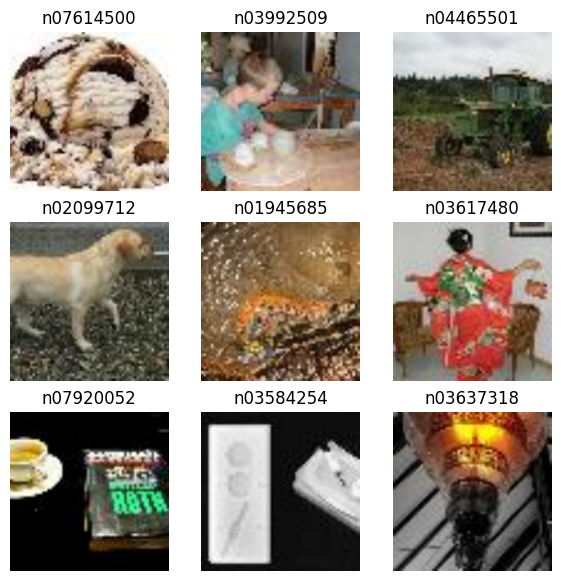

In [36]:
class_names = train_dataset.class_names

plt.figure(figsize=(7, 7))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

<h4>Prefetch</h4>

In [37]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

<h4>Augment Data</h4>

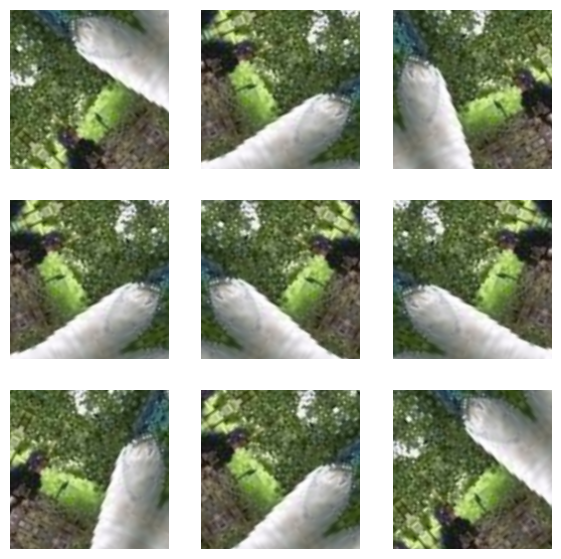

In [38]:
def data_augmenter():
    data_augmentation = tf.keras.Sequential()
    data_augmentation.add(RandomFlip('horizontal'))
    data_augmentation.add(RandomRotation(0.2))
    return data_augmentation

augmenter = data_augmenter()

for image, _ in train_dataset.take(1):
    plt.figure(figsize=(7, 7))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        augmented_image = augmenter(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0]/255)
        plt.axis('off')